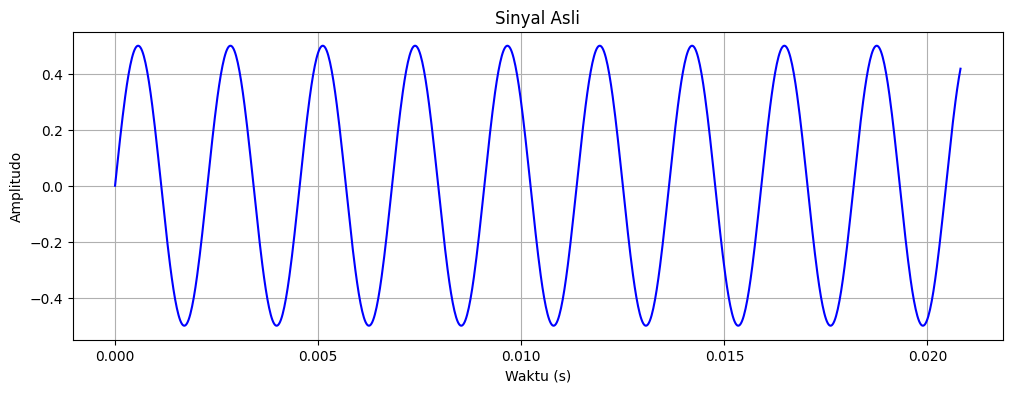

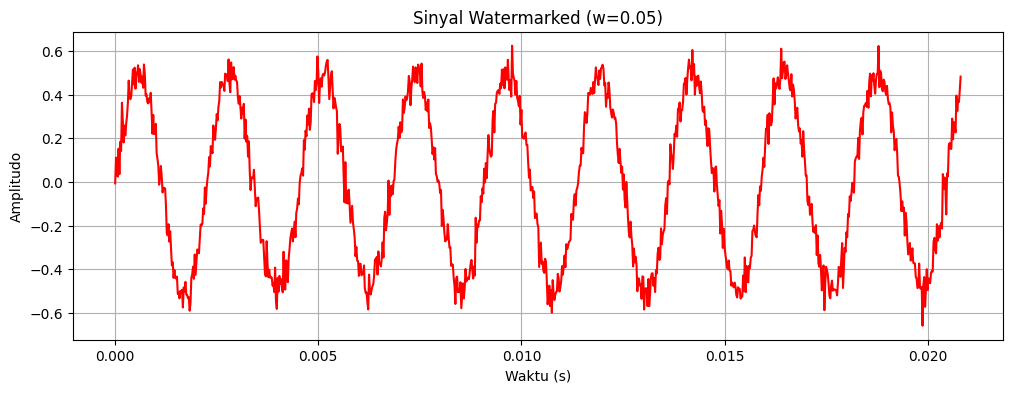

Memainkan suara ASLI...
Memainkan suara WATERMARKED dengan bobot 0.05...
Disimpan sebagai watermarked_w50.wav


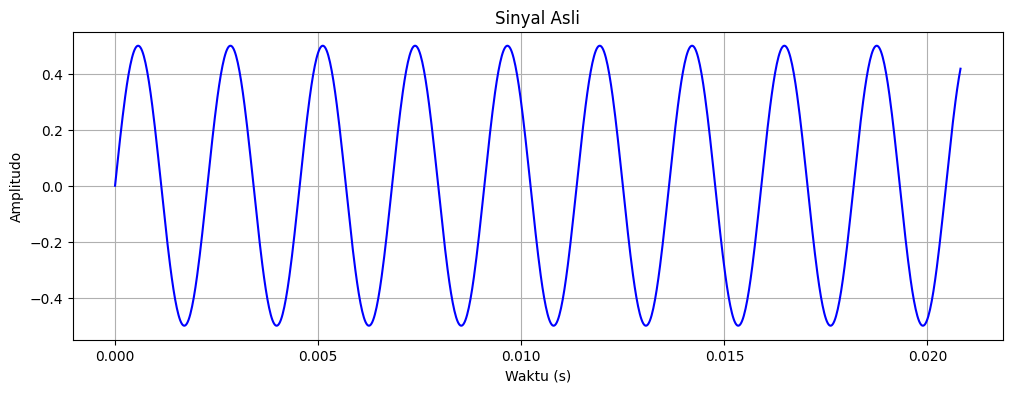

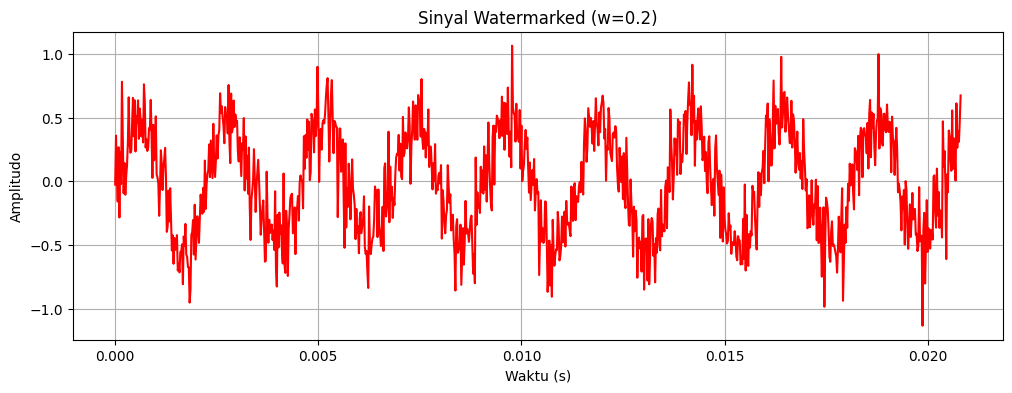

Memainkan suara ASLI...
Memainkan suara WATERMARKED dengan bobot 0.2...
Disimpan sebagai watermarked_w200.wav

--- Analisis Hasil Deteksi ---
Skor Deteksi pada Sinyal Asli (Kontrol): 0.001033
Skor Deteksi untuk Bobot 0.05: 0.050912
Skor Deteksi untuk Bobot 0.2: 0.200547


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
from scipy.io.wavfile import write

SAMPLE_RATE = 48000
DURATION = 5
FREQ = 440
SEED = 1018 # Saya 18 Oktober
WEIGHTS = [0.05, 0.2]

t = np.linspace(0., DURATION, int(SAMPLE_RATE * DURATION), endpoint=False)
host_signal = 0.5 * np.sin(2 * np.pi * FREQ * t)

np.random.seed(SEED)
pn_sequence = np.random.randn(len(host_signal))

detected_scores = {}

for weight in WEIGHTS:
    watermarked_signal = host_signal + (weight * pn_sequence)
    correlation = np.sum(watermarked_signal * pn_sequence) / len(watermarked_signal)
    detected_scores[weight] = correlation

    plt.figure(figsize=(12, 4))
    plt.plot(t[:1000], host_signal[:1000], color='blue')
    plt.title(f'Sinyal Asli')
    plt.xlabel('Waktu (s)')
    plt.ylabel('Amplitudo')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(12, 4))
    plt.plot(t[:1000], watermarked_signal[:1000], color='red')
    plt.title(f'Sinyal Watermarked (w={weight})')
    plt.xlabel('Waktu (s)')
    plt.ylabel('Amplitudo')
    plt.grid(True)
    plt.show()

    print("Memainkan suara ASLI...")
    sd.play(host_signal, SAMPLE_RATE)
    sd.wait()

    print(f"Memainkan suara WATERMARKED dengan bobot {weight}...")
    sd.play(watermarked_signal, SAMPLE_RATE)
    sd.wait()

    scaled = np.int16(watermarked_signal / np.max(np.abs(watermarked_signal)) * 32767)
    filename = f"watermarked_w{int(weight * 1000)}.wav"
    write(filename, SAMPLE_RATE, scaled)
    print(f"Disimpan sebagai {filename}")

print("\n--- Analisis Hasil Deteksi ---")
control_score = np.sum(host_signal * pn_sequence) / len(host_signal)
print(f"Skor Deteksi pada Sinyal Asli (Kontrol): {control_score:.6f}")

for weight, score in detected_scores.items():
    print(f"Skor Deteksi untuk Bobot {weight}: {score:.6f}")
